In [64]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
from google.colab import files

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
import time
from typing import Tuple
from sklearn.model_selection import KFold
import copy as cp
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [66]:
import random

np.random.seed(42)

## Data

In [67]:
data = pd.read_csv('https://raw.githubusercontent.com/KristianFodor/EmotionRecognition/main/exp2_oversampled.csv')

In [68]:
data['emotion'].value_counts()

Sad          763
Neutral      763
Angry        763
Happy        763
Surprised    763
Fearful      763
Name: emotion, dtype: int64

In [69]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
data['emotion'].replace(['Fearful', 'Neutral', 'Sad', 'Angry', 'Happy', 'Surprised'],
                        [1, 2, 3, 4, 5, 6], inplace=True)

data['gender'].replace(['M', 'F'],
                        [0,1], inplace=True)

In [71]:
print(df_new.emotion.value_counts())
df_new = df;
X = df_new.drop('emotion', axis=1)
Y = df_new['emotion']

6    759
4    752
2    741
5    741
3    739
1    716
Name: emotion, dtype: int64


In [72]:
from sklearn.utils import shuffle
df = shuffle(data).reset_index(drop=True)

In [73]:
df

,Unnamed: 0,gsr,heart_rate,temperature,emotion,median gsr,median heart_rate,median temp,date_time,id_user,gender
0,2267,186,103,28.3,4,166.0,103,28.6,05/04/2022 14:23:12,7,0
1,2545,219,95,25.3,5,180.0,94,26.4,13/03/2023 11:23:42,16,0
2,4159,50,80,29.0,1,81.0,93,28.9,05/04/2022 13:58:15,6,0
3,3549,105,95,28.5,6,67.0,93,28.3,13/03/2023 13:24:36,18,1
4,1606,66,90,28.2,4,80.0,91,28.2,05/04/2022 13:38:35,5,0
...,...,...,...,...,...,...,...,...,...,...,...
4573,4426,77,84,29.2,1,81.0,93,28.9,05/04/2022 13:48:51,6,0
4574,466,156,101,27.9,3,173.0,89,27.5,13/03/2023 15:28:46,24,0
4575,3092,199,101,26.8,6,180.0,94,26.4,13/03/2023 11:30:57,16,0
4576,3772,97,88,27.9,6,27.0,87,27.7,13/03/2023 13:39:18,19,0


In [74]:
X = df[['gsr', 'heart_rate', 'temperature', 'median gsr', 'median heart_rate', 'median temp']]
y = df['emotion']

In [75]:
y

0       4
1       5
2       1
3       6
4       4
       ..
4573    1
4574    3
4575    6
4576    6
4577    2
Name: emotion, Length: 4578, dtype: int64

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, index=X.index, columns = X.columns)

In [77]:
X

,gsr,heart_rate,temperature,median gsr,median heart_rate,median temp
0,0.516667,0.731707,0.748299,0.456311,0.793103,0.500000
1,0.608333,0.536585,0.544218,0.501618,0.482759,0.076923
2,0.138889,0.170732,0.795918,0.181230,0.448276,0.557692
3,0.291667,0.536585,0.761905,0.135922,0.448276,0.442308
4,0.183333,0.414634,0.741497,0.177994,0.379310,0.423077
...,...,...,...,...,...,...
4573,0.213889,0.268293,0.809524,0.181230,0.448276,0.557692
4574,0.433333,0.682927,0.721088,0.478964,0.310345,0.288462
4575,0.552778,0.682927,0.646259,0.501618,0.482759,0.076923
4576,0.269444,0.365854,0.721088,0.006472,0.241379,0.326923


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [80]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [81]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [82]:
model_multiclass = KNeighborsClassifier(n_neighbors=5)
model_multiclass.fit(X_train, y_train)
y_pred = model_multiclass.predict(X_test)
y_proba = model_multiclass.predict_proba(X_test)

In [83]:
classes = model_multiclass.classes_
classes

array([1, 2, 3, 4, 5, 6])

In [84]:
classifiers = [KNeighborsClassifier(n_neighbors=5), GaussianNB(), LinearDiscriminantAnalysis(solver='lsqr'), 
               MLPClassifier(), SVC(probability=True), GradientBoostingClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]


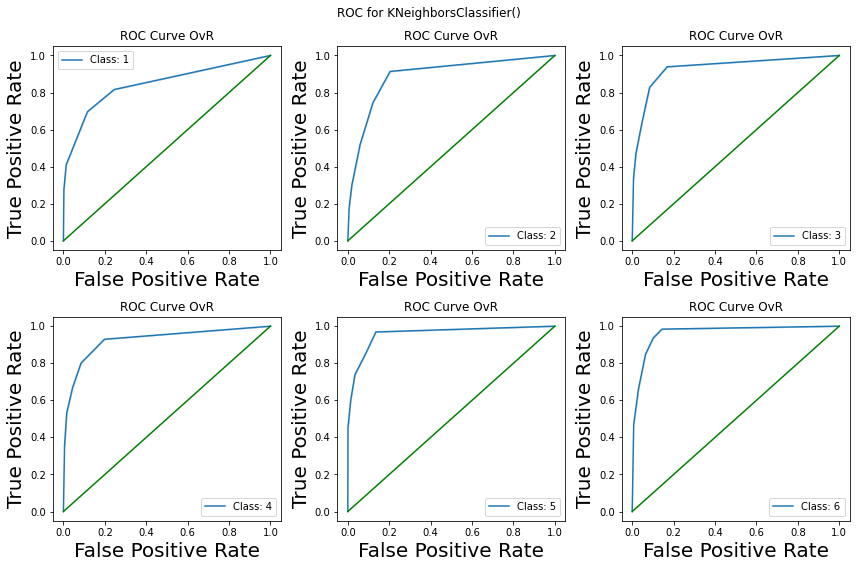

1 ROC AUC OvR: 0.8441
2 ROC AUC OvR: 0.8896
3 ROC AUC OvR: 0.9297
4 ROC AUC OvR: 0.9240
5 ROC AUC OvR: 0.9579
6 ROC AUC OvR: 0.9637
average ROC AUC OvR: 0.9182


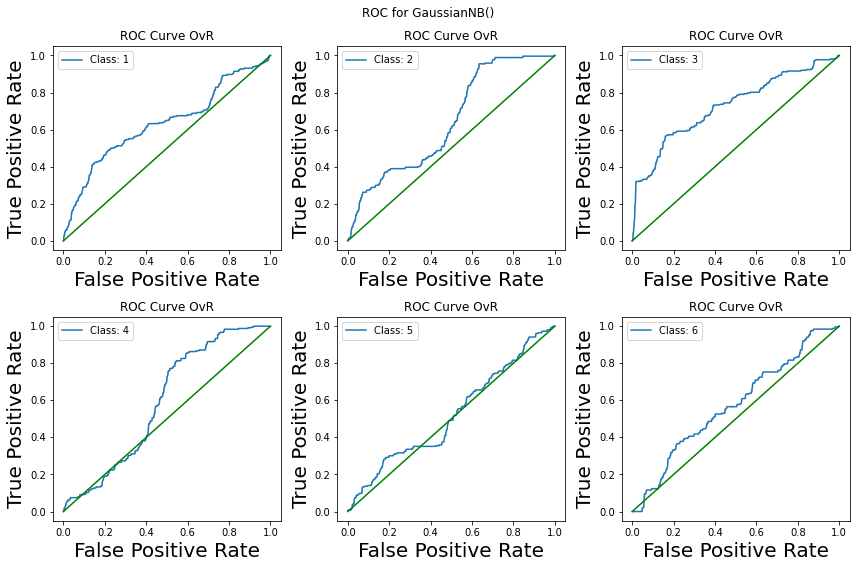

1 ROC AUC OvR: 0.6331
2 ROC AUC OvR: 0.6444
3 ROC AUC OvR: 0.7273
4 ROC AUC OvR: 0.5934
5 ROC AUC OvR: 0.5225
6 ROC AUC OvR: 0.5734
average ROC AUC OvR: 0.6157


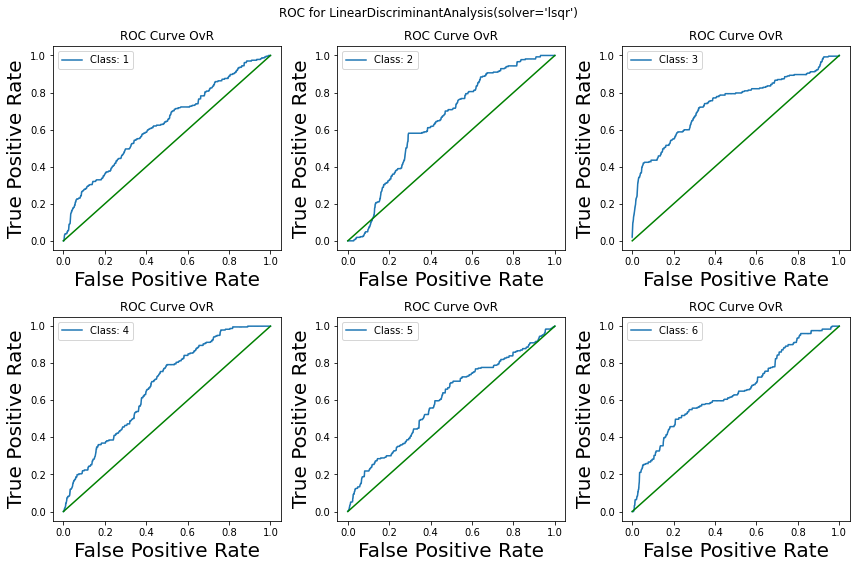

1 ROC AUC OvR: 0.6287
2 ROC AUC OvR: 0.6434
3 ROC AUC OvR: 0.7373
4 ROC AUC OvR: 0.6754
5 ROC AUC OvR: 0.6004
6 ROC AUC OvR: 0.6531
average ROC AUC OvR: 0.6564


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


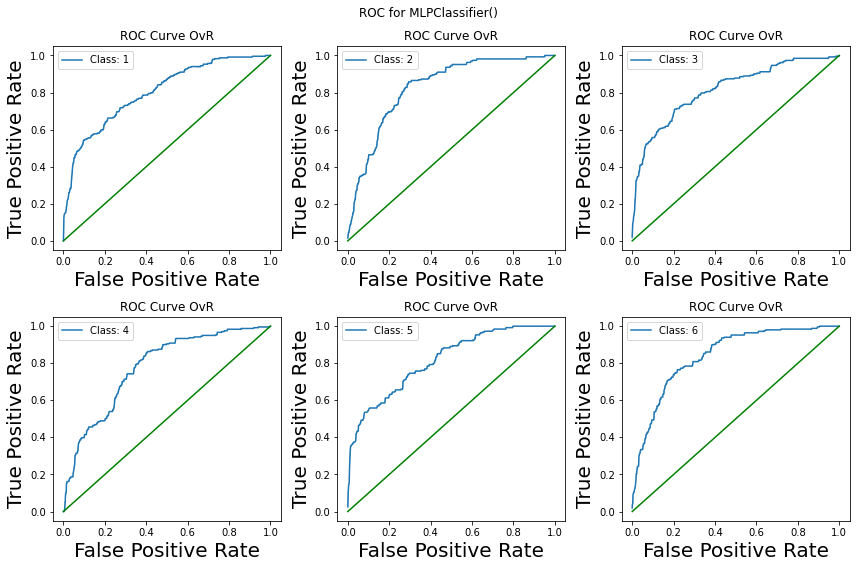

1 ROC AUC OvR: 0.8026
2 ROC AUC OvR: 0.8291
3 ROC AUC OvR: 0.8164
4 ROC AUC OvR: 0.7777
5 ROC AUC OvR: 0.8146
6 ROC AUC OvR: 0.8419
average ROC AUC OvR: 0.8137


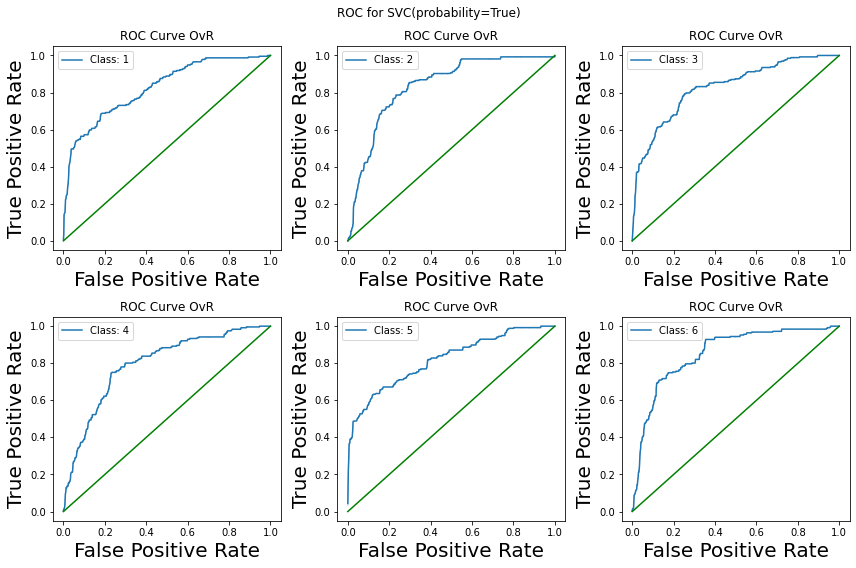

1 ROC AUC OvR: 0.8252
2 ROC AUC OvR: 0.8354
3 ROC AUC OvR: 0.8286
4 ROC AUC OvR: 0.7951
5 ROC AUC OvR: 0.8188
6 ROC AUC OvR: 0.8535
average ROC AUC OvR: 0.8261


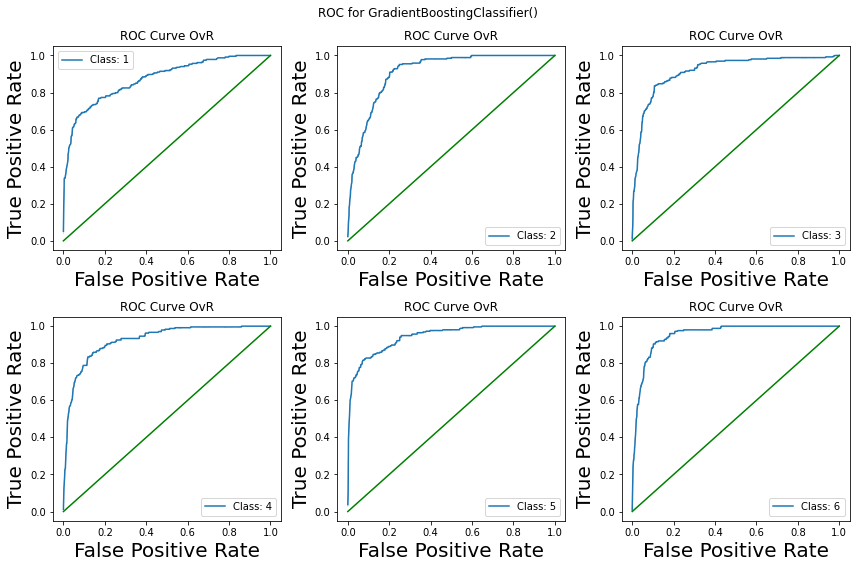

1 ROC AUC OvR: 0.8740
2 ROC AUC OvR: 0.9106
3 ROC AUC OvR: 0.9182
4 ROC AUC OvR: 0.9253
5 ROC AUC OvR: 0.9433
6 ROC AUC OvR: 0.9541
average ROC AUC OvR: 0.9209


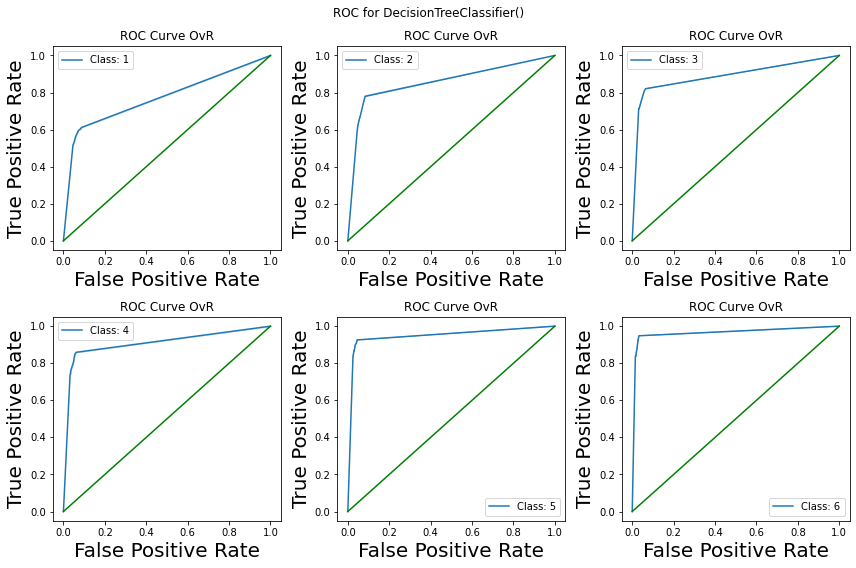

1 ROC AUC OvR: 0.7710
2 ROC AUC OvR: 0.8638
3 ROC AUC OvR: 0.8883
4 ROC AUC OvR: 0.9079
5 ROC AUC OvR: 0.9479
6 ROC AUC OvR: 0.9642
average ROC AUC OvR: 0.8905


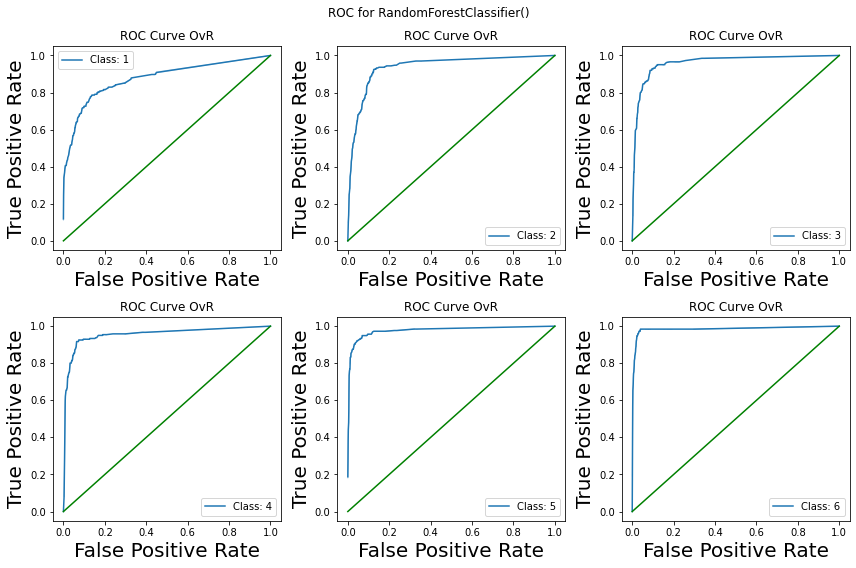

1 ROC AUC OvR: 0.8778
2 ROC AUC OvR: 0.9373
3 ROC AUC OvR: 0.9611
4 ROC AUC OvR: 0.9548
5 ROC AUC OvR: 0.9774
6 ROC AUC OvR: 0.9843
average ROC AUC OvR: 0.9488


In [85]:
for classifier in classifiers:
    model_multiclass = classifier
    model_multiclass.fit(X_train, y_train)
    y_pred = model_multiclass.predict(X_test)
    y_proba = model_multiclass.predict_proba(X_test)

    classes = model_multiclass.classes_
    classes

    # Plots the Probability Distributions and the ROC Curves One vs Rest
    plt.figure(figsize = (12, 8))
    plt.suptitle('ROC for '+str(model_multiclass))
    bins = [i/20 for i in range(20)] + [1]
    roc_auc_ovr = {}

    for i in range(len(classes)):
        # Gets the class
        c = classes[i]

        # Prepares an auxiliar dataframe to help with the plots
        df_aux = X_test.copy()
        df_aux['class'] = [1 if y == c else 0 for y in y_test]
        df_aux['prob'] = y_proba[:, i]
        df_aux = df_aux.reset_index(drop = True)

        # Plots the probability distribution for the class and the rest
        #ax = plt.subplot(2, 3, i+1)
        #sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        #ax.set_title(c)
        #ax.legend([f"Class: {c}", "Rest"])
        #ax.set_xlabel(f"P(x = {c})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 3, i+1)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title("ROC Curve OvR")
        ax_bottom.legend([f"Class: {c}"])

        # Calculates the ROC AUC OvR
        roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

    plt.tight_layout()
    plt.show()
    
    # Displays the ROC AUC for each class
    avg_roc_auc = 0
    i = 0
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
    # Compares with sklearn (average only)
    # "Macro" average = unweighted mean
    roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro')

In [86]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

1 ROC AUC OvR: 0.8778
2 ROC AUC OvR: 0.9373
3 ROC AUC OvR: 0.9611
4 ROC AUC OvR: 0.9548
5 ROC AUC OvR: 0.9774
6 ROC AUC OvR: 0.9843
average ROC AUC OvR: 0.9488


In [87]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro')

0.9487759454754735

In [88]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE

# print('Original dataset shape %s' % Counter(y))

# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)
# print('Resampled dataset shape %s' % Counter(y_res))


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)
        return actual_classes, predicted_classes, predicted_proba


In [91]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

In [92]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = KNeighborsClassifier(n_neighbors=5)

In [93]:
X = X.to_numpy()

In [94]:
y

0       4
1       5
2       1
3       6
4       4
       ..
4573    1
4574    3
4575    6
4576    6
4577    2
Name: emotion, Length: 4578, dtype: int64

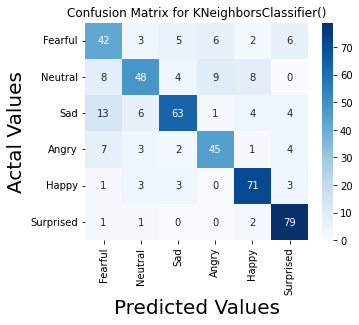

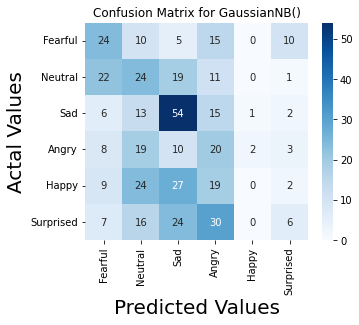

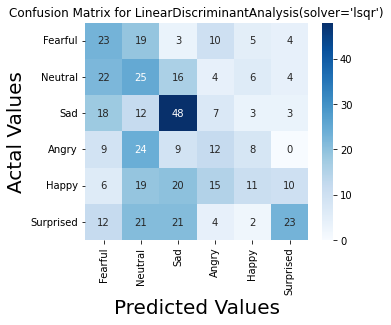

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


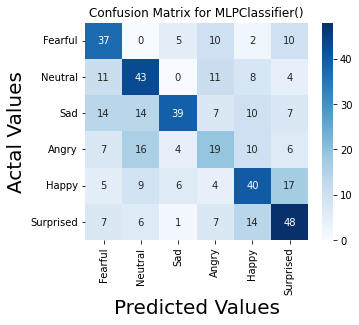

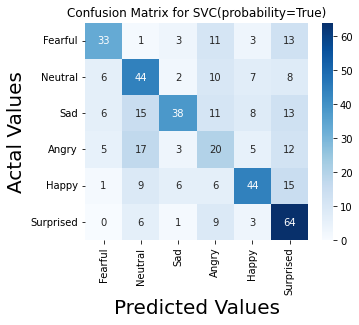

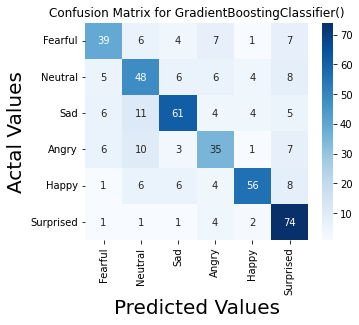

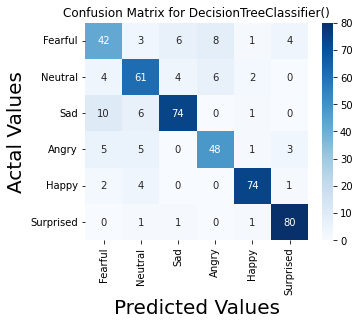

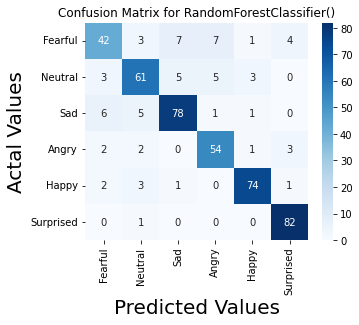

In [95]:
for classifier in classifiers:
    actual_classes, predicted_classes, predict_proba = cross_val_predict(classifier, kfold, X, y)
    cm = confusion_matrix(actual_classes, predicted_classes)
    cm_df = pd.DataFrame(cm,
                         index = ['Fearful', 'Neutral', 'Sad', 'Angry', 'Happy', 'Surprised'], 
                         columns = ['Fearful', 'Neutral', 'Sad', 'Angry', 'Happy', 'Surprised'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True,cmap='Blues', fmt='.3g')
    plt.title('Confusion Matrix for ' + str(classifier))
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [96]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X,y)

10

In [97]:
import time

In [98]:
def classifiers(X,y):
    boxplot=pd.DataFrame(columns=['classa', 'value'])
    classifiers = [KNeighborsClassifier(n_neighbors=5), GaussianNB(), LinearDiscriminantAnalysis(solver='lsqr'), 
                   MLPClassifier(), SVC(), GradientBoostingClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

    i = 0
    res_final = pd.DataFrame(columns=['accuracy', 'prec_1', 'prec_2', 'prec_3', 'prec_4', 'prec_5', 'prec_6', 'rec_1', 'rec_2', 'rec_3', 'rec_4', 'rec_5', 'rec_6', 'f1-sc_1','f1-sc_2','f1-sc_3','f1-sc_4', 'f1-sc_5', 'f1-sc_6', 'time', 'tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn'])
    
    for classifier in classifiers:
        name = str(classifier)
        x=0
        results = pd.DataFrame(columns=[name+'accuracy', name+'prec_1', name+'prec_2', name+'prec_3', name+'prec_4', name+'prec_5', name+'prec_6', name+'rec_1', name+'rec_2', name+'rec_3', name+'rec_4', name+'rec_5', name+'rec_6', name+'f1-sc_1',name+'f1-sc_2',name+'f1-sc_3',name+'f1-sc_4', name+'f1-sc_5', name+'f1-sc_6', name+'time', 'tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn','tp', 'tn', 'fp', 'fn'])
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            result = classifier.fit(X_train, y_train)
            start = time.time()
            prediction = classifier.predict(X_test)
            end = time.time()
            p, r, f, s = precision_recall_fscore_support(y_test, prediction)
            cm = multilabel_confusion_matrix(y_test, prediction)

            results.loc[x]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
            results.loc[x] = [metrics.accuracy_score(y_test, prediction),p[0], p[1], p[2], p[3], p[4], p[5], r[0], r[1], r[2], r[3], r[4], r[5], f[0], f[1], f[2], f[3], f[4], f[5], (end - start),  cm[0][0][0], cm[0][0][1], cm[0][1][0], cm[0][1][1],cm[1][0][0], cm[1][0][1], cm[1][1][0], cm[1][1][1], cm[2][0][0], cm[2][0][1], cm[2][1][0], cm[2][1][1], cm[3][0][0], cm[3][0][1], cm[3][1][0], cm[3][1][1], cm[4][0][0], cm[4][0][1], cm[4][1][0], cm[4][1][1], cm[5][0][0], cm[5][0][1], cm[5][1][0], cm[5][1][1]]
            boxplot.loc[i] = [name, metrics.accuracy_score(y_test, prediction)]
            x=x+1
            i=i+1
        display(results)
        res_final = pd.DataFrame( np.concatenate( (res_final.values, results.values), axis=0 ) )
    return boxplot, res_final

In [99]:
box, res_final = classifiers(X,y)

,KNeighborsClassifier()accuracy,KNeighborsClassifier()prec_1,KNeighborsClassifier()prec_2,KNeighborsClassifier()prec_3,KNeighborsClassifier()prec_4,KNeighborsClassifier()prec_5,KNeighborsClassifier()prec_6,KNeighborsClassifier()rec_1,KNeighborsClassifier()rec_2,KNeighborsClassifier()rec_3,...,fp,fn,tp,tn,fp,fn,tp,tn,fp,fn
0,0.705240,0.649123,0.632353,0.726190,0.688889,0.792208,0.719512,0.500000,0.558442,0.743902,...,16,62,363,16,18,61,367,23,9,59
1,0.733624,0.718310,0.604938,0.745763,0.690476,0.808824,0.831579,0.629630,0.690141,0.611111,...,21,58,374,13,16,55,358,16,5,79
2,0.713974,0.720588,0.640000,0.720588,0.780488,0.784091,0.623377,0.612500,0.648649,0.636364,...,21,64,353,19,17,69,373,29,8,48
3,0.744541,0.785714,0.675325,0.746032,0.689189,0.727273,0.814815,0.743243,0.641975,0.691176,...,29,51,378,18,14,48,345,20,5,88
4,0.746725,0.735294,0.644737,0.783784,0.712329,0.844156,0.755556,0.625000,0.644737,0.794521,...,19,52,368,12,13,65,356,22,12,68
5,0.661572,0.670886,0.600000,0.582090,0.648352,0.784615,0.686047,0.563830,0.512195,0.650000,...,30,59,378,14,15,51,364,27,8,59
6,0.733624,0.704918,0.643678,0.723684,0.718750,0.776471,0.823529,0.581081,0.658824,0.763889,...,19,46,361,19,12,66,359,15,14,70
7,0.733624,0.711538,0.568182,0.797297,0.760000,0.792683,0.781609,0.552239,0.714286,0.702381,...,21,57,360,17,16,65,361,19,10,68
8,0.743982,0.710145,0.573171,0.792683,0.769231,0.833333,0.787234,0.628205,0.681159,0.764706,...,22,40,362,13,17,65,356,20,7,74
9,0.704595,0.571429,0.731343,0.770270,0.694118,0.747126,0.681818,0.524590,0.628205,0.633333,...,17,59,355,22,15,65,357,28,12,60


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,GaussianNB()accuracy,GaussianNB()prec_1,GaussianNB()prec_2,GaussianNB()prec_3,GaussianNB()prec_4,GaussianNB()prec_5,GaussianNB()prec_6,GaussianNB()rec_1,GaussianNB()rec_2,GaussianNB()rec_3,...,fp,fn,tp,tn,fp,fn,tp,tn,fp,fn
0,0.305677,0.419753,0.279661,0.354610,0.210000,0,0.125000,0.453333,0.458333,0.617284,...,55,21,378,2,78,0,368,14,74,2
1,0.296943,0.382022,0.344086,0.328000,0.183206,0,0.294118,0.425000,0.457143,0.525641,...,44,24,380,3,75,0,359,12,82,5
2,0.325328,0.361702,0.240000,0.368794,0.324074,0,0.266667,0.492754,0.363636,0.666667,...,54,35,382,0,76,0,367,11,76,4
3,0.301310,0.376471,0.283186,0.358333,0.219298,0,0.240000,0.432432,0.372093,0.524390,...,39,25,379,1,78,0,365,19,68,6
4,0.288210,0.333333,0.296296,0.291045,0.252252,0,0.250000,0.363636,0.400000,0.600000,...,46,28,380,1,77,0,358,15,80,5
5,0.323144,0.404762,0.219298,0.425197,0.254545,0,0.304348,0.435897,0.352113,0.568421,...,43,28,393,0,65,0,364,16,71,7
6,0.272926,0.326531,0.283333,0.276423,0.236559,1,0.086957,0.426667,0.409639,0.557377,...,59,22,375,0,82,1,362,21,73,2
7,0.318777,0.436782,0.309524,0.378641,0.243243,0,0.103448,0.481013,0.487500,0.565217,...,44,27,365,2,91,0,364,26,65,3
8,0.332604,0.352273,0.338235,0.427419,0.224719,0,0.100000,0.397436,0.560976,0.609195,...,55,20,388,0,69,0,373,18,64,2
9,0.293217,0.450549,0.186207,0.325000,0.276316,0,0.285714,0.525641,0.369863,0.582090,...,73,21,382,4,71,0,368,15,68,6


,LinearDiscriminantAnalysis(solver='lsqr')accuracy,LinearDiscriminantAnalysis(solver='lsqr')prec_1,LinearDiscriminantAnalysis(solver='lsqr')prec_2,LinearDiscriminantAnalysis(solver='lsqr')prec_3,LinearDiscriminantAnalysis(solver='lsqr')prec_4,LinearDiscriminantAnalysis(solver='lsqr')prec_5,LinearDiscriminantAnalysis(solver='lsqr')prec_6,LinearDiscriminantAnalysis(solver='lsqr')rec_1,LinearDiscriminantAnalysis(solver='lsqr')rec_2,LinearDiscriminantAnalysis(solver='lsqr')rec_3,...,fp,fn,tp,tn,fp,fn,tp,tn,fp,fn
0,0.307860,0.250000,0.233577,0.364407,0.322034,0.200000,0.564103,0.344828,0.421053,0.551282,...,65,19,366,20,67,5,351,17,68,22
1,0.327511,0.344828,0.325397,0.390244,0.245614,0.312500,0.310345,0.370370,0.465909,0.444444,...,62,14,352,33,58,15,350,40,50,18
2,0.299127,0.363636,0.271186,0.336735,0.137931,0.288889,0.372549,0.410256,0.405063,0.428571,...,61,8,355,32,58,13,342,32,65,19
3,0.305677,0.295918,0.268293,0.363636,0.250000,0.200000,0.418605,0.386667,0.445946,0.615385,...,63,16,355,16,83,4,355,25,60,18
4,0.292576,0.354430,0.234783,0.369369,0.155172,0.250000,0.352941,0.368421,0.397059,0.512500,...,71,9,351,33,63,11,345,33,62,18
5,0.318777,0.362500,0.271930,0.407407,0.265625,0.303030,0.254237,0.341176,0.455882,0.505747,...,48,17,347,23,78,10,349,44,50,15
6,0.331878,0.352941,0.366071,0.365217,0.192308,0.342105,0.285714,0.365854,0.476744,0.525000,...,62,10,359,25,61,13,354,40,48,16
7,0.268559,0.246914,0.220339,0.393617,0.164179,0.315789,0.283333,0.338983,0.361111,0.513889,...,67,11,340,26,80,12,330,43,68,17
8,0.341357,0.418605,0.266667,0.386139,0.275862,0.256410,0.433962,0.387097,0.438356,0.557143,...,66,16,365,29,53,10,351,30,53,23
9,0.339168,0.376344,0.257812,0.482353,0.238095,0.289474,0.400000,0.460526,0.417722,0.500000,...,63,15,361,27,58,11,354,30,53,20


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

,MLPClassifier()accuracy,MLPClassifier()prec_1,MLPClassifier()prec_2,MLPClassifier()prec_3,MLPClassifier()prec_4,MLPClassifier()prec_5,MLPClassifier()prec_6,MLPClassifier()rec_1,MLPClassifier()rec_2,MLPClassifier()rec_3,...,fp,fn,tp,tn,fp,fn,tp,tn,fp,fn
0,0.515284,0.505051,0.477273,0.543860,0.538462,0.590909,0.445946,0.609756,0.506024,0.424658,...,52,28,350,36,20,52,349,41,35,33
1,0.500000,0.515152,0.455696,0.700000,0.468750,0.426471,0.509259,0.560440,0.537313,0.350000,...,49,30,360,39,30,29,323,53,27,55
2,0.506550,0.536842,0.500000,0.500000,0.444444,0.542857,0.500000,0.600000,0.571429,0.378788,...,49,28,350,32,38,38,335,46,31,46
3,0.543668,0.551282,0.459184,0.666667,0.440000,0.761194,0.487805,0.544304,0.681818,0.378378,...,44,22,355,16,36,51,309,63,26,60
4,0.504367,0.409639,0.500000,0.681818,0.447761,0.662338,0.424242,0.531250,0.656716,0.370370,...,51,30,337,26,44,51,331,57,28,42
5,0.436681,0.351064,0.458824,0.625000,0.376812,0.493827,0.432990,0.523810,0.464286,0.317460,...,57,26,339,41,38,40,316,55,45,42
6,0.510917,0.522936,0.447917,0.642857,0.448276,0.565217,0.500000,0.647727,0.500000,0.415385,...,53,26,356,30,33,39,348,42,26,42
7,0.506550,0.350427,0.464789,0.780000,0.542857,0.600000,0.500000,0.561644,0.492537,0.481481,...,40,38,361,24,37,36,327,45,41,45
8,0.444201,0.431579,0.548780,0.633333,0.350877,0.397436,0.329412,0.539474,0.454545,0.469136,...,52,20,343,47,36,31,338,57,34,28
9,0.505470,0.417582,0.436782,0.812500,0.440000,0.594937,0.460784,0.612903,0.567164,0.393939,...,46,22,341,32,37,47,325,55,30,47


,SVC()accuracy,SVC()prec_1,SVC()prec_2,SVC()prec_3,SVC()prec_4,SVC()prec_5,SVC()prec_6,SVC()rec_1,SVC()rec_2,SVC()rec_3,...,fp,fn,tp,tn,fp,fn,tp,tn,fp,fn
0,0.517467,0.681818,0.451613,0.568627,0.371429,0.625000,0.444444,0.511364,0.666667,0.371795,...,37,26,334,33,36,55,333,50,35,40
1,0.578603,0.704918,0.433333,0.728814,0.463768,0.726027,0.518868,0.565789,0.506494,0.558442,...,40,32,351,20,34,53,338,51,14,55
2,0.497817,0.603448,0.446602,0.653061,0.466667,0.485294,0.450000,0.437500,0.567901,0.484848,...,50,28,355,35,35,33,307,66,31,54
3,0.532751,0.882353,0.537190,0.580000,0.472727,0.594937,0.394958,0.394737,0.747126,0.386667,...,55,26,354,32,25,47,319,72,20,47
4,0.539301,0.540541,0.511628,0.703704,0.473684,0.538462,0.524272,0.615385,0.628571,0.426966,...,51,36,366,30,27,35,324,49,31,54
5,0.521834,0.649123,0.436364,0.630435,0.384615,0.632353,0.525253,0.451220,0.631579,0.460317,...,46,30,350,25,40,43,333,47,26,52
6,0.550218,0.578947,0.534653,0.648148,0.500000,0.655172,0.465347,0.564103,0.666667,0.466667,...,42,34,359,20,41,38,335,54,22,47
7,0.508734,0.637931,0.485149,0.543860,0.477612,0.561644,0.421569,0.528571,0.628205,0.449275,...,49,32,343,32,42,41,322,59,34,43
8,0.562363,0.573529,0.500000,0.754717,0.470588,0.603448,0.552632,0.541667,0.564706,0.476190,...,37,32,371,23,28,35,322,51,21,63
9,0.529540,0.683333,0.390909,0.586207,0.625000,0.583333,0.465347,0.539474,0.661538,0.390805,...,45,35,352,30,33,42,329,54,27,47


,GradientBoostingClassifier()accuracy,GradientBoostingClassifier()prec_1,GradientBoostingClassifier()prec_2,GradientBoostingClassifier()prec_3,GradientBoostingClassifier()prec_4,GradientBoostingClassifier()prec_5,GradientBoostingClassifier()prec_6,GradientBoostingClassifier()rec_1,GradientBoostingClassifier()rec_2,GradientBoostingClassifier()rec_3,...,fp,fn,tp,tn,fp,fn,tp,tn,fp,fn
0,0.689956,0.738462,0.573171,0.600000,0.806818,0.790323,0.645833,0.615385,0.643836,0.609375,...,22,71,369,13,27,49,350,34,12,62
1,0.718341,0.620000,0.587500,0.818182,0.805556,0.835821,0.643564,0.476923,0.691176,0.720000,...,21,58,371,11,20,56,352,36,5,65
2,0.698690,0.671429,0.629630,0.651515,0.779221,0.794521,0.670330,0.626667,0.680000,0.614286,...,25,60,367,15,18,58,351,30,16,61
3,0.679039,0.865385,0.526786,0.625000,0.647059,0.813559,0.736842,0.592105,0.746835,0.600000,...,27,44,372,11,27,48,351,25,12,70
4,0.696507,0.746667,0.670213,0.776119,0.514286,0.892857,0.645833,0.622222,0.692308,0.693333,...,27,36,381,6,21,50,356,34,6,62
5,0.709607,0.753623,0.531915,0.738462,0.716049,0.805556,0.766234,0.684211,0.724638,0.592593,...,29,58,370,14,16,58,369,18,12,59
6,0.696507,0.655172,0.576923,0.729167,0.743243,0.824561,0.717949,0.633333,0.659341,0.460526,...,15,55,376,10,25,47,336,33,5,84
7,0.683406,0.794118,0.432990,0.709677,0.662162,0.796875,0.784946,0.642857,0.666667,0.586667,...,27,49,370,13,24,51,353,20,12,73
8,0.700219,0.659091,0.623529,0.681818,0.704225,0.807018,0.755556,0.734177,0.688312,0.633803,...,31,50,380,11,20,46,352,22,15,68
9,0.687090,0.797297,0.630952,0.710526,0.517241,0.853333,0.600000,0.737500,0.688312,0.710526,...,28,30,344,11,38,64,357,36,10,54


,DecisionTreeClassifier()accuracy,DecisionTreeClassifier()prec_1,DecisionTreeClassifier()prec_2,DecisionTreeClassifier()prec_3,DecisionTreeClassifier()prec_4,DecisionTreeClassifier()prec_5,DecisionTreeClassifier()prec_6,DecisionTreeClassifier()rec_1,DecisionTreeClassifier()rec_2,DecisionTreeClassifier()rec_3,...,fp,fn,tp,tn,fp,fn,tp,tn,fp,fn
0,0.838428,0.786885,0.807692,0.830986,0.850000,0.886598,0.845070,0.676056,0.807692,0.786667,...,14,68,357,11,4,86,385,11,2,60
1,0.814410,0.797101,0.730769,0.802817,0.810811,0.819277,0.915663,0.639535,0.730769,0.780822,...,8,60,369,15,6,68,372,7,3,76
2,0.794760,0.714286,0.746988,0.773333,0.775000,0.907895,0.839506,0.608108,0.738095,0.734177,...,11,62,375,7,7,69,373,13,4,68
3,0.790393,0.621212,0.772727,0.805970,0.812500,0.878049,0.826667,0.554054,0.829268,0.760563,...,19,65,364,10,12,72,382,13,1,62
4,0.792576,0.694915,0.723404,0.831169,0.769231,0.860759,0.857143,0.561644,0.800000,0.744186,...,13,50,371,11,8,68,371,12,3,72
5,0.788210,0.757143,0.589744,0.794872,0.794521,0.871429,0.910112,0.670886,0.718750,0.765432,...,22,58,379,9,9,61,366,8,3,81
6,0.820961,0.813333,0.671053,0.797297,0.800000,0.896104,0.923077,0.677778,0.750000,0.855072,...,15,52,373,8,8,69,364,7,3,84
7,0.792576,0.658537,0.696970,0.746269,0.829545,0.847222,0.951807,0.666667,0.630137,0.735294,...,9,73,374,11,12,61,373,4,2,79
8,0.787746,0.725806,0.662651,0.736111,0.891892,0.839506,0.858824,0.616438,0.873016,0.688312,...,19,66,363,13,13,68,367,12,5,73
9,0.785558,0.647059,0.692308,0.736264,0.805195,0.888889,0.928571,0.532258,0.715909,0.797619,...,17,62,388,7,6,56,369,6,4,78


,RandomForestClassifier()accuracy,RandomForestClassifier()prec_1,RandomForestClassifier()prec_2,RandomForestClassifier()prec_3,RandomForestClassifier()prec_4,RandomForestClassifier()prec_5,RandomForestClassifier()prec_6,RandomForestClassifier()rec_1,RandomForestClassifier()rec_2,RandomForestClassifier()rec_3,...,fp,fn,tp,tn,fp,fn,tp,tn,fp,fn
0,0.827511,0.775510,0.722892,0.783133,0.853659,0.896104,0.916667,0.542857,0.769231,0.866667,...,12,70,375,8,6,69,373,7,1,77
1,0.810044,0.777778,0.831169,0.769231,0.786517,0.797297,0.896104,0.620253,0.780488,0.740741,...,15,70,382,15,2,59,380,8,1,69
2,0.796943,0.707317,0.705263,0.847222,0.791045,0.904762,0.873418,0.716049,0.736264,0.772152,...,20,53,388,6,7,57,378,10,1,69
3,0.825328,0.838710,0.568966,0.870130,0.802326,0.920455,0.873563,0.666667,0.687500,0.797619,...,12,69,361,7,9,81,370,11,1,76
4,0.816594,0.757576,0.705882,0.720588,0.871795,0.935897,0.891566,0.724638,0.789474,0.765625,...,18,68,365,5,15,73,374,9,1,74
5,0.803493,0.786667,0.654321,0.785714,0.824324,0.883117,0.888889,0.710843,0.688312,0.743243,...,11,61,372,9,9,68,374,9,3,72
6,0.812227,0.822581,0.736111,0.769231,0.789474,0.881579,0.861702,0.637500,0.679487,0.821918,...,9,60,373,9,9,67,363,13,1,81
7,0.838428,0.803279,0.827160,0.756410,0.851351,0.871429,0.904255,0.636364,0.761364,0.855072,...,10,63,386,9,2,61,361,9,3,85
8,0.822757,0.754098,0.760563,0.804598,0.797468,0.880435,0.925373,0.657143,0.710526,0.864198,...,11,63,358,11,7,81,384,5,6,62
9,0.796499,0.791667,0.642857,0.820513,0.847222,0.829545,0.850575,0.500000,0.782609,0.771084,...,7,61,361,15,8,73,364,13,6,74


In [100]:
res_final

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.70524,0.649123,0.632353,0.72619,0.688889,0.792208,0.719512,0.5,0.558442,0.743902,...,16.0,62.0,363.0,16.0,18.0,61.0,367.0,23.0,9.0,59.0
1,0.733624,0.71831,0.604938,0.745763,0.690476,0.808824,0.831579,0.62963,0.690141,0.611111,...,21.0,58.0,374.0,13.0,16.0,55.0,358.0,16.0,5.0,79.0
2,0.713974,0.720588,0.64,0.720588,0.780488,0.784091,0.623377,0.6125,0.648649,0.636364,...,21.0,64.0,353.0,19.0,17.0,69.0,373.0,29.0,8.0,48.0
3,0.744541,0.785714,0.675325,0.746032,0.689189,0.727273,0.814815,0.743243,0.641975,0.691176,...,29.0,51.0,378.0,18.0,14.0,48.0,345.0,20.0,5.0,88.0
4,0.746725,0.735294,0.644737,0.783784,0.712329,0.844156,0.755556,0.625,0.644737,0.794521,...,19.0,52.0,368.0,12.0,13.0,65.0,356.0,22.0,12.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.803493,0.786667,0.654321,0.785714,0.824324,0.883117,0.888889,0.710843,0.688312,0.743243,...,11.0,61.0,372.0,9.0,9.0,68.0,374.0,9.0,3.0,72.0
76,0.812227,0.822581,0.736111,0.769231,0.789474,0.881579,0.861702,0.6375,0.679487,0.821918,...,9.0,60.0,373.0,9.0,9.0,67.0,363.0,13.0,1.0,81.0
77,0.838428,0.803279,0.82716,0.75641,0.851351,0.871429,0.904255,0.636364,0.761364,0.855072,...,10.0,63.0,386.0,9.0,2.0,61.0,361.0,9.0,3.0,85.0
78,0.822757,0.754098,0.760563,0.804598,0.797468,0.880435,0.925373,0.657143,0.710526,0.864198,...,11.0,63.0,358.0,11.0,7.0,81.0,384.0,5.0,6.0,62.0


In [101]:
res_final.to_csv('results_final.csv')
#files.download('results_final.csv')

In [102]:
def graf(box):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.pylab as pylab
    
    from matplotlib import rcParams

    # figure size in inches
    rcParams['axes.labelsize'] = 20
    rcParams['figure.figsize'] = 20,25
    
    fig, axes = plt.subplots(4, 2)
    
    sns.boxplot(  x=box[box['classa']=='KNeighborsClassifier()'].classa, y=box[box['classa']=='KNeighborsClassifier()'].value,  orient='v' , ax=axes[0,0])
    sns.boxplot(  x=box[box['classa']=='GaussianNB()'].classa, y=box[box['classa']=='GaussianNB()'].value, orient='v' , ax=axes[0,1])
    sns.boxplot(  x=box[box['classa']=='LinearDiscriminantAnalysis(solver=\'lsqr\')'].classa, y=box[box['classa']=='LinearDiscriminantAnalysis(solver=\'lsqr\')'].value, orient='v' , ax=axes[1,0])
    sns.boxplot(  x=box[box['classa']=='MLPClassifier()'].classa, y=box[box['classa']=='MLPClassifier()'].value, orient='v' , ax=axes[1,1])
    sns.boxplot(  x=box[box['classa']=='SVC()'].classa, y=box[box['classa']=='SVC()'].value, orient='v' , ax=axes[2,0])
    sns.boxplot(  x=box[box['classa']=='GradientBoostingClassifier()'].classa, y=box[box['classa']=='GradientBoostingClassifier()'].value, orient='v' , ax=axes[2,1])
    sns.boxplot(  x=box[box['classa']=='DecisionTreeClassifier()'].classa, y=box[box['classa']=='DecisionTreeClassifier()'].value, orient='v' , ax=axes[3,0])
    sns.boxplot(  x=box[box['classa']=='RandomForestClassifier()'].classa, y=box[box['classa']=='RandomForestClassifier()'].value, orient='v' , ax=axes[3,1])
    
    axes[0,0].set(xlabel="method", ylabel="accuracy")
    axes[0,1].set(xlabel="method", ylabel="accuracy")

    axes[1,0].set(xlabel="method", ylabel="accuracy")
    axes[1,1].set(xlabel="method", ylabel="accuracy")

    axes[2,0].set(xlabel="method", ylabel="accuracy")
    axes[2,1].set(xlabel="method", ylabel="accuracy")
    
    axes[3,0].set(xlabel="method", ylabel="accuracy")
    axes[3,1].set(xlabel="method", ylabel="accuracy")

    
    plt.show()

In [103]:
#graf(box)

In [104]:
def graf(box):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.pylab as pylab
    
    from matplotlib import rcParams

    # figure size in inches
    rcParams['axes.labelsize'] = 20
    rcParams['figure.figsize'] = 20,25
    
    fig, axes = plt.subplots(4, 2)
    
    sns.violinplot(  x=box[box['classa']=='KNeighborsClassifier()'].classa, y=box[box['classa']=='KNeighborsClassifier()'].value,  orient='v' , ax=axes[0,0])
    sns.violinplot(  x=box[box['classa']=='GaussianNB()'].classa, y=box[box['classa']=='GaussianNB()'].value, orient='v' , ax=axes[0,1])
    sns.violinplot(  x=box[box['classa']=='LinearDiscriminantAnalysis(solver=\'lsqr\')'].classa, y=box[box['classa']=='LinearDiscriminantAnalysis(solver=\'lsqr\')'].value, orient='v' , ax=axes[1,0])
    sns.violinplot(  x=box[box['classa']=='MLPClassifier()'].classa, y=box[box['classa']=='MLPClassifier()'].value, orient='v' , ax=axes[1,1])
    sns.violinplot(  x=box[box['classa']=='SVC()'].classa, y=box[box['classa']=='SVC()'].value, orient='v' , ax=axes[2,0])
    sns.violinplot(  x=box[box['classa']=='GradientBoostingClassifier()'].classa, y=box[box['classa']=='GradientBoostingClassifier()'].value, orient='v' , ax=axes[2,1])
    sns.violinplot(  x=box[box['classa']=='DecisionTreeClassifier()'].classa, y=box[box['classa']=='DecisionTreeClassifier()'].value, orient='v' , ax=axes[3,0])
    sns.violinplot(  x=box[box['classa']=='RandomForestClassifier()'].classa, y=box[box['classa']=='RandomForestClassifier()'].value, orient='v' , ax=axes[3,1])
    
    axes[0,0].set(xlabel="method", ylabel="accuracy")
    axes[0,1].set(xlabel="method", ylabel="accuracy")

    axes[1,0].set(xlabel="method", ylabel="accuracy")
    axes[1,1].set(xlabel="method", ylabel="accuracy")

    axes[2,0].set(xlabel="method", ylabel="accuracy")
    axes[2,1].set(xlabel="method", ylabel="accuracy")
    
    axes[3,0].set(xlabel="method", ylabel="accuracy")
    axes[3,1].set(xlabel="method", ylabel="accuracy")

    
    plt.show()

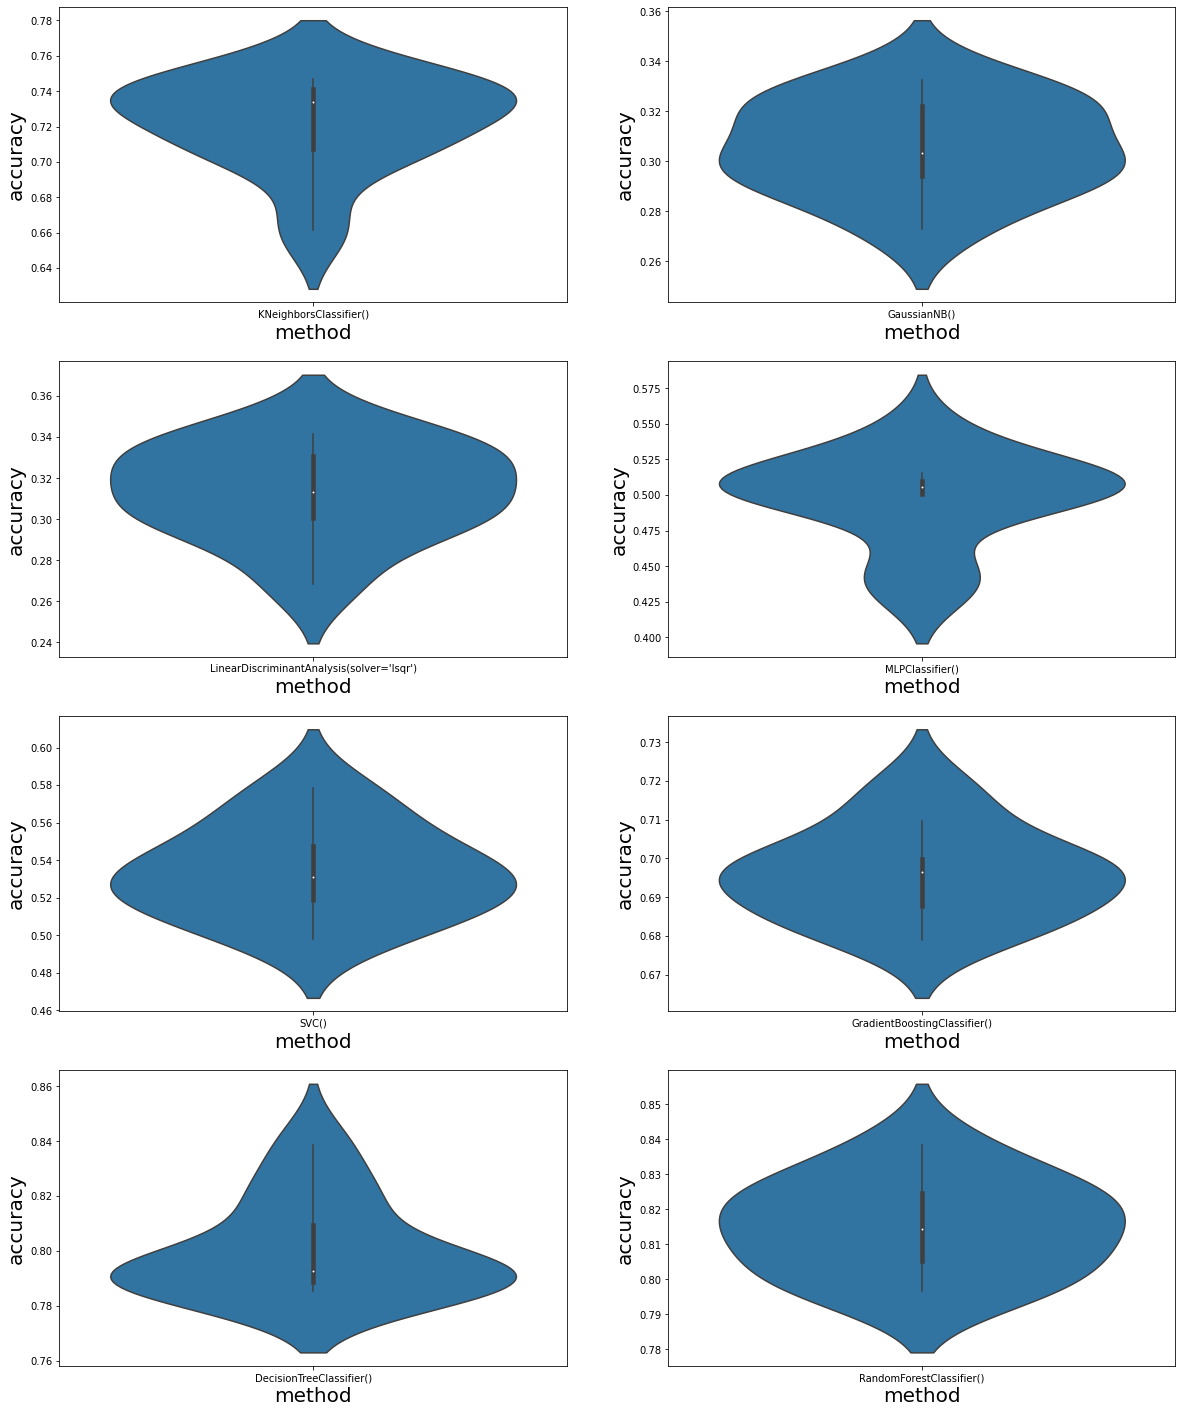

In [105]:
graf(box)